In [78]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn
import numpy as np

In [35]:
seaborn.set_style("white")

In [41]:
rating = pd.read_csv("rating.csv", header=None)
rating.columns = ["name", "score"]
colloquium = pd.read_csv("colloquium.csv")
colloquium.columns = ["name", "group", "checker", "mark"]
hw1 = pd.read_csv("hw1.csv", header=None).fillna(0)
hw1.columns = ["name", "hw1_mark"]

In [42]:
common = pd.merge(rating, colloquium, on="name")
common = pd.merge(common, hw1, on="name")
data = common.dropna()

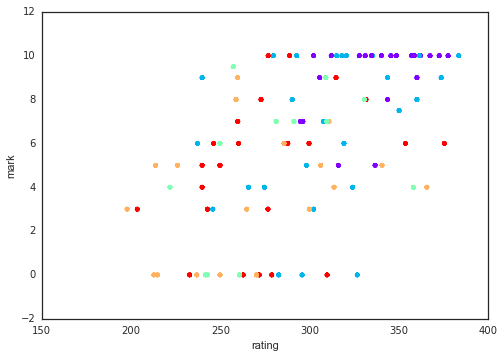

In [76]:
plt.scatter(data["score"], data["mark"], c=data["group"], cmap="rainbow", marker=(100, 2))
plt.xlabel("rating")
plt.ylabel("mark")
#plt.savefig("fig/rating_col.pdf")

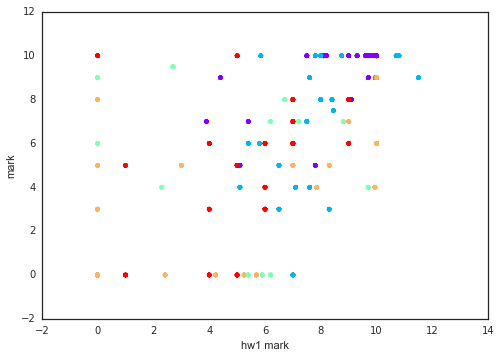

In [77]:
plt.scatter(data["hw1_mark"], data["mark"], c=data["group"], cmap="rainbow", marker=(100, 2))
plt.xlabel("hw1 mark")
plt.ylabel("mark")
#plt.savefig("fig/hw1_col.pdf")

In [131]:
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.preprocessing import LabelEncoder

In [ ]:
# replace name strings
le = LabelEncoder()
data[data.columns[0]] = le.fit_transform(data[data.columns[0]])
data[data.columns[3]] = le.fit_transform(data[data.columns[3]])

In [116]:
X = data[data.columns.drop("mark")]
X /= X.max()   # standartization for linear regression
y = data["mark"]

In [132]:
# Linear Regression
clf = LinearRegression()
cv_sc = cross_val_score(clf, X, y, make_scorer(mean_absolute_error))
cv_sc, cv_sc.mean()

(array([ 1.49079947,  2.41567377,  2.74856589]), 2.2183463772273009)

In [119]:
clf = LinearRegression()
clf.fit(X, y)
for col, c in zip(X.columns, clf.coef_):
    print col, ":", c

name : -1.78612662948
score : 7.06128776741
group : -84.1905771099
checker : 0.621288582779
hw1_mark : 3.10000684039


In [120]:
reindex = np.random.permutation(np.arange(X.shape[0]))
X_sh = X.reindex(reindex).dropna()
y_sh = y.reindex(reindex).dropna()

In [133]:
cv_sc = cross_val_score(LinearRegression(), X_sh, y_sh, make_scorer(mean_absolute_error))
cv_sc, cv_sc.mean()

(array([ 2.14900361,  2.22584139,  2.22809087]), 2.2009786241902929)

In [134]:
# RandomForest
cv_sc = cross_val_score(RandomForestRegressor(), X, y, make_scorer(mean_absolute_error))
cv_sc, cv_sc.mean()

(array([ 1.88285714,  2.63235294,  2.77058824]), 2.4285994397759105)

In [135]:
cv_sc = cross_val_score(RandomForestRegressor(), X_sh, y_sh, make_scorer(mean_absolute_error))
cv_sc, cv_sc.mean()

(array([ 2.0609375 ,  2.71774194,  2.51612903]), 2.4316028225806452)

RandomForest предсказывает хуже!

In [130]:
clf = RandomForestRegressor()
clf.fit(X, y)
for col, c in zip(X.columns, clf.feature_importances_):
    print col, ":", c

name : 0.151297229415
score : 0.235513760656
group : 0.081170407536
checker : 0.110087075344
hw1_mark : 0.42193152705


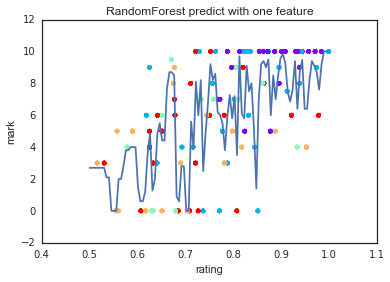

In [149]:
clf = RandomForestRegressor()
clf.fit(X[["score"]], y)
grid = np.linspace(0.5, 1, 100)
line = clf.predict(grid[:, np.newaxis])
plt.scatter(X["score"], y, c=X["group"], cmap="rainbow", marker=(100, 2))
plt.xlabel("rating")
plt.ylabel("mark")
plt.plot(grid, line)
plt.title("RandomForest predict with one feature")

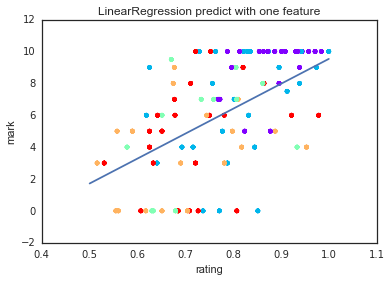

In [150]:
clf = LinearRegression()
clf.fit(X[["score"]], y)
grid = np.linspace(0.5, 1, 100)
line = clf.predict(grid[:, np.newaxis])
plt.scatter(X["score"], y, c=X["group"], cmap="rainbow", marker=(100, 2))
plt.xlabel("rating")
plt.ylabel("mark")
plt.plot(grid, line)
plt.title("LinearRegression predict with one feature")